In [42]:
from bs4 import BeautifulSoup
import pandas 
import requests
import matplotlib.pyplot as plt
import math
import string
import numpy as np
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stop = stopwords.words('english')

In [43]:
# link 
link = "https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/dp/B09G9HD6PD/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1"
# link="https://www.amazon.in/Dhanwanthari-Pain-Powerful-Quick-Relief/dp/B0DCG7TX52/ref=sr_1_2_sspa?dib=eyJ2IjoiMSJ9.wBEe44SZqJTrArtY7oG4gS-V2APm0wQzCRO230DszfSDbZgqVdK_971z853LVccJtCk0ZQMLc8oWwP_hu1nZmpyViRbPBiJ-f2PVm9pEFLAt4b0UeMuwLm27iaXdSOJyOPDibgS87QobszmkbO5Jxv8z02z1UoyNv6ZaY9blxHbubub3SW2wMDqRIUWY3o6eXzbUtDFMFGtajgWvoIKBe2xap9UdsMA4fH7XmtngxTqIsNMY7YcJMNWDDS4sFg95KVHh_6UNgPfeG_sTAkP5Ja-mkGZDxrtkCPX_Bc_OW8A.W5YCjQUt7aD6C1MnFvKWHnaRjexz-VpgOx-95eZp2UA&dib_tag=se&keywords=worst+product&qid=1730898145&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1"
# link = "https://www.amazon.in/Selling-Amazon-Secrets-Revealed-Getting-ebook/dp/B07FNT91GG/ref=sr_1_fkmr0_1?crid=2J7HXFMOWY76A&dib=eyJ2IjoiMSJ9.rHtr4eoNWhNzPAjYBsrnzn0mVuqihurBObVFxS2r2BE.M4wCws5FmhprsGOvyhKG-bGdaYhUugrvXTUsJDxa1EE&dib_tag=se&keywords=worst+rated+product+of+amazon&qid=1730120463&sprefix=worst+rated+product+of+amazon%2Caps%2C948&sr=8-1-fkmr0"
# link="https://www.amazon.in/dp/B0CJYFM6M6/ref=syn_sd_onsite_desktop_0?ie=UTF8&psc=1&pd_rd_plhdr=t&aref=94IcQbkG6E"
# Add headers to mimic a real browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}

sourcecode = ""
try:
    sourcecode = requests.get(link, headers=headers).text
except:
    print("Link is invalid")


In [44]:
soup = None
if sourcecode=='':
    print("invalid link")
else:
    soup=BeautifulSoup(sourcecode)
    print(soup)

with open("class_test/file.txt", "w", encoding="utf-8") as f:
    f.write(sourcecode)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

FileNotFoundError: [Errno 2] No such file or directory: 'class_test/file.txt'

In [55]:
# amazon:
def findtotalreviews(soup):
    review_count_tag = soup.find("span", {"data-hook": "total-review-count"})
    if review_count_tag is None:
        raise ValueError("Review count not found on the page.")
    try:
        num = review_count_tag.text.split()[0]  # Extract first part of the text (number)
    except AttributeError:
        raise ValueError("Error parsing review count text.")
        # split the text to extract numbers
    num=review_count_tag.text.split()[0]   
    ans=0
    for x in num:
        if x.isnumeric():
            ans=ans*10+int(x)
        if(x==' '):
            break
    return ans
def converttonumber ( num:str):
    n=0;
    for x in num:
        if x.isnumeric():
            n=n*10+int(x);
    return n;

def get_product_price(soup:BeautifulSoup)->int:
    price_tag=soup.find("span",class_="a-price-whole")
    if price_tag==None:
        raise ValueError("Cant Find Price of Product")
    return converttonumber(price_tag.text)

def get_product_title(soup:BeautifulSoup)->str:
    title_tag=soup.find("span",id="productTitle")
    if title_tag==None:
        raise ValueError("Cant Find Title of Product")
    name=title_tag.text.strip()
    return name



In [56]:
print(get_product_price(soup))
print(get_product_title(soup))

45499
Apple iPhone 13 (128GB) - Midnight


In [6]:
print(findtotalreviews(soup))

30966


In [7]:
def findnumberofreviews(total,percent):
    return total*(percent/100);
def findavgrating(total,percentages:list)->int:
    rating=0;
    n= len(percentages)
    if len(percentages)==0 or total ==0:
        raise ValueError("the total is 0")
    for i,per in enumerate(percentages):
        rating=rating+(findnumberofreviews(total,per)*(n-i))/total
        
    return rating
    
def getAllRatingNumber(total, percentages):
    return [findnumberofreviews(total, p) for p in percentages]



In [19]:
try :
    total =findtotalreviews(soup)
except :
    total=0
# total=0
print(total)

30966


In [20]:
def percentagePlot(labels:list,percentages:list):
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.bar(labels, percentages, color="skyblue")
    plt.xlabel("Stars")
    plt.ylabel("Percentage (%)")
    plt.title("Percentage Plot")
    plt.ylim(0, 100)
    plt.show()
    
    

In [21]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [22]:
def findReviewsPercentages(soup:BeautifulSoup):
    div=soup.find("div",class_="a-section a-spacing-none a-text-right aok-nowrap")
    spans=div.find_all("span") 
    return  [x.text for x in spans]
    
def convertPercentageToInt(strlist:[str]):
    return [int(x[:-1]) for x in  strlist]


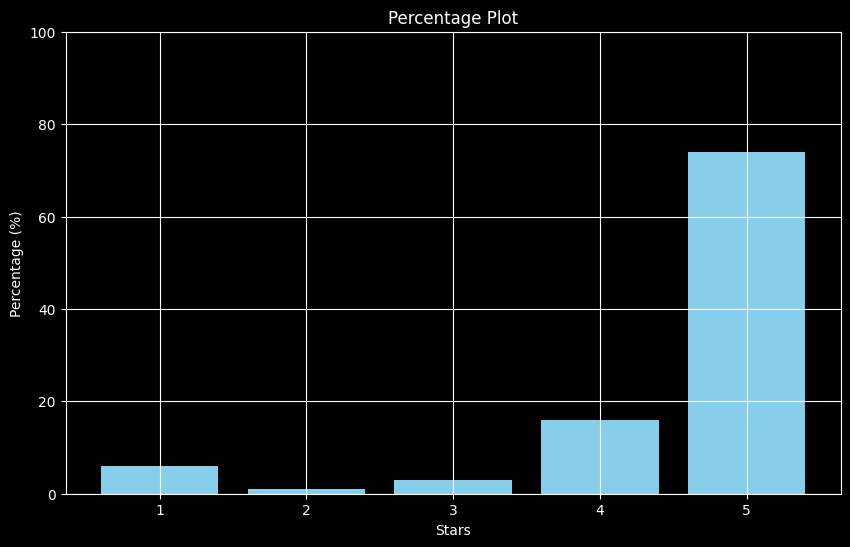

In [23]:
labels=[5,4,3,2,1]
percentagelist=convertPercentageToInt(findReviewsPercentages(soup))
percentagePlot(labels,percentagelist)

In [24]:
def globalPlot(labels:list,reviews:list):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, reviews)
    plt.grid(True)
    plt.xlabel("Stars")
    plt.ylabel("Percentage (%)")
    plt.title("Percentage Plot")
    plt.ylim(0, math.ceil(max(reviews))*1.10)
    plt.show()


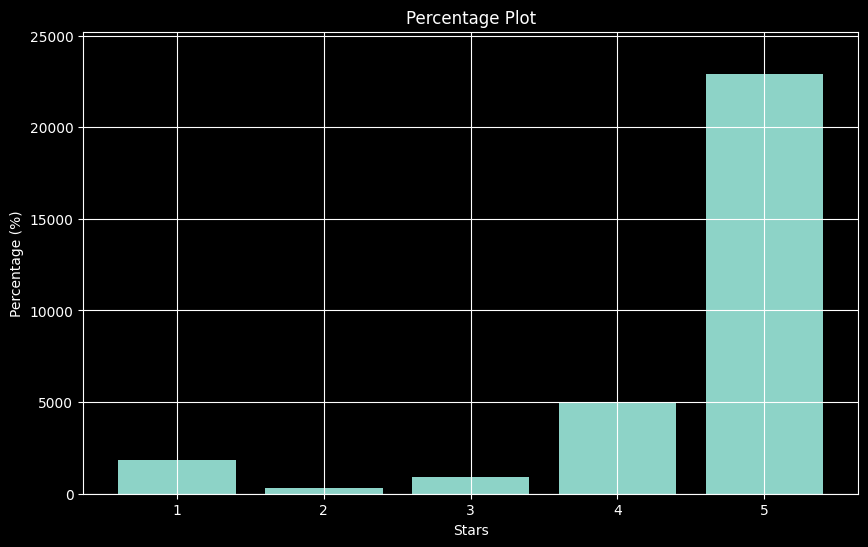

In [25]:
# labels 
labels=[5,4,3,2,1]
totalreviewlist=getAllRatingNumber(total,percentagelist) 
globalPlot(labels,totalreviewlist)

In [26]:
def getReviews(soup:BeautifulSoup):
    reviews=soup.find_all("div",class_="a-row a-spacing-small review-data")
    return [x.text for x in reviews]
    

In [27]:
getReviews(soup)

['\niPhone 13 ReviewI recently upgraded to the iPhone 13, and I couldn’t be happier with my choice! The A15 Bionic chip provides lightning-fast performance, whether I’m gaming, streaming, or multitasking.The Super Retina XDR display is absolutely stunning, offering vibrant colors and sharp details that make everything from photos to videos pop. Battery life is exceptional—I can easily get through a full day without needing to charge.The camera system is a game-changer. The dual cameras capture incredible photos, even in low light, and the new cinematic mode adds a professional touch to videos.iOS is smooth and user-friendly, and the overall design feels premium and sleek. If you’re looking for a reliable, powerful smartphone, the iPhone 13 is definitely worth it. Highly recommend!\nRead more',
 '\nFirst of all Thanks to Amazon and the seller Darshitha Ezone for this Genuine product. I Got this one @41.5k And at that price it was a better option. I compared IPhone 13 With Samsung s23 an

In [28]:
#  get helpfulness:
def getHelpFull(soup):
    helpfultxt=[x.text for x in soup.find_all("span",{"data-hook":"helpful-vote-statement"})]
    return [int(x.split()[0]) for x in helpfultxt]
def getHelpFullness(soup,total:int):
    return [(x/total)*100 for x in getHelpFull(soup)]
    


In [29]:
print(getHelpFullness(soup,total))

[0.012917393270038107, 0.29710004521087646, 0.8105664276948912, 2.764322159788155]


In [30]:
import pickle
model=None
vectorizer_review=None
tfidf_review=None
# Load the model
with open('picklefiles/logisticregression.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizers
with open('picklefiles/vectorizer_review.pkl', 'rb') as review_vec_file:
    vectorizer_review = pickle.load(review_vec_file)

# with open('vectorizer_summary.pkl', 'rb') as summary_vec_file:
#     vectorizer_summary = pickle.load(summary_vec_file)

# Load the TF-IDF vectorizers (if you used them)
with open('picklefiles/tfidf_review.pkl', 'rb') as tfidf_review_file:
    tfidf_review = pickle.load(tfidf_review_file)

# with open('tfidf_summary.pkl', 'rb') as tfidf_summary_file:
#     tfidf_summary = pickle.load(tfidf_summary_file)

# Load other transformers as needed


In [31]:
try :
    overall = findavgrating(total,percentagelist)
except:
    overall=[]
helpful=getHelpFullness(soup,total)
reviewstxt=getReviews(soup)


In [32]:
# print(reviewstxt)

In [91]:
# function to convert to lower case :
def lowercase(str:[str])->[str]:
    return str.lower()
#  function to remove punctuations :
def removepunctuations(s: str) -> str:
    # Create translation table to replace punctuation with spaces
    translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    # Remove punctuation using the translation table
    return s.translate(translation_table)
#  function to remove punctuations :
def removestopwords(s: str, stop: set=stop) -> str:
    return ' '.join([word for word in s.split() if word not in stop])
# apply lemmatizer
def applylemmatizer(s:str)->[str]:
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(s) for s in s.split()])
# apply counter vector
def applycountvector(s: str, vectorizer: CountVectorizer) -> any:
    return vectorizer.transform([s])
# apply tfidf vector
def applyTFIDFvector(s: str, vectorizer: TfidfVectorizer) -> any:
    return vectorizer.transform([s])

# combined all  the parameters :
# def combineparameters (x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary):
#     return hstack([x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary])
def combineparameter(model,overall,reviewstxt,helpful:list,vectorizer_review,tfidf_review):
        """this function will do every single task from data preprocessing till the last output generation"""
        pre_processed_data=[applydatapreprocessing(x,vectorizer_review,tfidf_review) for x in reviewstxt]
        inputs=[hstack([overall,helpful[i],data]) for i,data in enumerate(pre_processed_data)]
        return inputs
def applydatapreprocessing(s:str,cvector:CountVectorizer,tfidf:TfidfVectorizer)->any:
    s=lowercase(s)
    s=removepunctuations(s)
    s=removestopwords(s)
    s=applylemmatizer(s)
    s_vec=applycountvector(s,cvector)
    s_tfidf=applyTFIDFvector(s,tfidf)
    return hstack([s_tfidf,s_vec])



In [92]:
def findmaxoccurences(outputs:list):
    pos=0;
    neg=0;
    neu=0;
    for x in outputs:
        if x==1:
            pos+=1;
        if x==0:
            neu+=1;
        if x==-1:
            neg+=1;
    if pos==0 and neg==0 and neu==0:
        return "not enough data found for analysis"
    if(pos>neg and pos>neu):
        return "positive" 
    elif(neg>pos and neg>neu):
        return "negative"
    else:
        return "neutral"

def findpredictions(model,inputs):
    return [model.predict(x) for x in inputs]
    

In [93]:

def model_predict(model,overall,reviewstxt,helpful:list,vectorizer_review,tfidf_review):
        """this function will do every single task from data preprocessing till the last output generation"""
        pre_processed_data=[applydatapreprocessing(x,vectorizer_review,tfidf_review) for x in reviewstxt]
        inputs=[hstack([overall,helpful[i],data]) for i,data in enumerate(pre_processed_data)]
        outputs=findpredictions(model,inputs)
        return findmaxoccurences(outputs)
    
model_predict(model,overall,reviewstxt,helpful,vectorizer_review,tfidf_review)

'positive'

In [102]:
inputs=combineparameter(model,overall,reviewstxt,helpful,vectorizer_review,tfidf_review)


In [103]:
print(inputs)

[<1x39375 sparse matrix of type '<class 'numpy.float64'>'
	with 141 stored elements in COOrdinate format>, <1x39375 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in COOrdinate format>, <1x39375 sparse matrix of type '<class 'numpy.float64'>'
	with 161 stored elements in COOrdinate format>, <1x39375 sparse matrix of type '<class 'numpy.float64'>'
	with 299 stored elements in COOrdinate format>]


In [118]:
# Assuming you have a fitted logistic regression model called `model`
# and a set of input features `inputs` (e.g., a list of sparse matrices)

# Get the probability of each class for each sample
def find_probability(model,inputs):
    probabilities = [model.predict_proba(input) for input in inputs]
    neg=0
    neu=0
    pos=0
    for i, prob in enumerate(probabilities):
        for class_label, p in zip(model.classes_, prob[0]):  # prob[0] is for the first (or only) sample
            if(class_label==np.int64(-1)):
                neg+=p
            if(class_label==np.int64(0)):
                neu+=p
            if(class_label==np.int64(1)):
                pos+=p           
    neg_value = (neg / len(probabilities)) if len(probabilities) > 0 else 0
    neu_value = (neu / len(probabilities)) if len(probabilities) > 0 else 0
    pos_value = (pos / len(probabilities)) if len(probabilities) > 0 else 0

    # Return sentiment proportions
    result = [
    {"label": "negative", "value": f"{neg_value:.4f}"},
    {"label": "neutral", "value": f"{neu_value:.4f}"},
    {"label": "positive", "value": f"{pos_value:.4f}"}
    ]
    
    return result


In [119]:
prob_dict=find_probability(model,inputs)



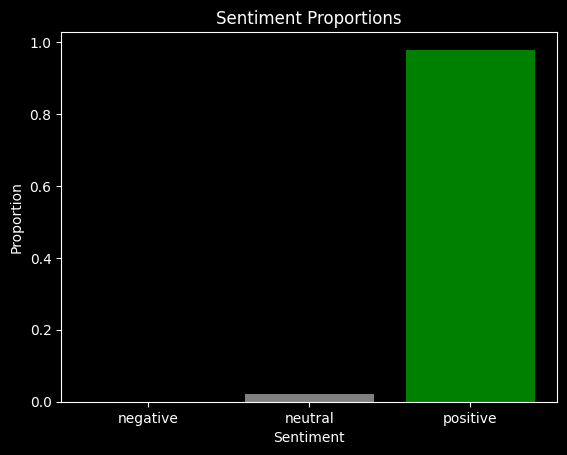

In [125]:

# Extract labels and values
labels = [item['label'] for item in prob_dict]
values = [float(item['value']) for item in prob_dict]  # Convert to float for plotting

# Plot the bar chart
plt.bar(labels, values, color=['red', 'gray', 'green'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Sentiment Proportions')

# Show the plot
plt.show()

[{'label': 'negative', 'value': '0.0000'}, {'label': 'neutral', 'value': '0.0217'}, {'label': 'positive', 'value': '0.9783'}]
